# Peter Moss Acute Myeloid / Lymphoblastic Leukemia AI Research Project

## ALL FastAI Resnet 18 Classifier
**Using The ALL Image Database for Image Processing & The Leukemia Blood Cell Image Classification Using Convolutional Neural Network Research Paper**    

![Peter Moss Acute Myeloid / Lymphoblastic Leukemia AI Research Project](https://www.PeterMossAmlAllResearch.com/media/images/banner.png)

The ALL FastAI Resnet 18 Classifier was created by  [Adam Milton-Barker](https://github.com/AdamMiltonBarker) based on [Salvatore Raieli's](https://github.com/salvatorera) [Resnet50](https://github.com/AMLResearchProject/AML-ALL-Classifiers/blob/master/Python/_FastAI/Resnet50/ALL-FastAI-Resnet-50.ipynb) project. The classifier provides a Google Colab notebook that uses FastAI with Resnet18 and ALL_IDB2 from the [Acute Lymphoblastic Leukemia Image Database for Image Processing dataset](https://homes.di.unimi.it/scotti/all/). 

## FastAI Resnet18 Classifier Project Contributors

- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - PhD Immunolgy / Bioinformaticia, Bologna, Italy
- [Adam Milton-Barker](https://github.com/AdamMiltonBarker "Adam Milton-Barker") - Bigfinite IoT Network Engineer & Intel Software Innovator, Barcelona, Spain

# ALL Image Database for Image Processing by Fabio Scotti

![Acute Lymphoblastic Leukemia Image Database for Image Processing](https://github.com/AMLResearchProject/AML-ALL-Detection-System/raw/master/Classifiers/Movidius/NCS/Tensorflow/V1/Media/Images/slides.png)
_Fig 1. Samples of augmented data generated using the Acute Lymphoblastic Leukemia Image Database for Image Processing dataset._

The [Acute Lymphoblastic Leukemia Image Database for Image Processing](https://homes.di.unimi.it/scotti/all/) dataset created by [Fabio Scotti, Associate Professor Dipartimento di Informatica, Università degli Studi di Milano](https://homes.di.unimi.it/scotti/) is used in this notebook.

Although in the [Leukemia Blood Cell Image Classification Using Convolutional Neural Network](http://www.ijcte.org/vol10/1198-H0012.pdf "Leukemia Blood Cell Image Classification Using Convolutional Neural Network") paper the ALL_IDB1 dataset is used, in this notebook you will use the ALL_IDB2 dataset. After removing 10 images per class for further testing and demonstrations, the dataset will be split into 80% and 20% for training and testing respectively.

## Gain Access To ALL-IDB

You you need to be granted access to use the Acute Lymphoblastic Leukemia Image Database for Image Processing dataset. You can find the application form and information about getting access to the dataset on [this page](https://homes.di.unimi.it/scotti/all/#download) as well as information on how to contribute back to the project [here](https://homes.di.unimi.it/scotti/all/results.php).

# Clone Peter Moss AML & ALL Classifiers Repository

First of all you should clone the [AML & ALL Classifiers](https://github.com/AMLResearchProject/AML-ALL-Classifiers/ "AML & ALL Classifiers") repo to your device. To do this you can navigate to the location you want to clone the repository to on your device using terminal (cd Your/Clone/Location), and then use the following command:

```
  $ git clone https://github.com/AMLResearchProject/AML-ALL-Classifiers.git
```

Once you have used the command above you will see a directory called **AML-ALL-Classifiers** in the location you chose to clone the repo to. In terminal, navigate to the **AML-ALL-Classifiers/Python/_FastAI/Resnet_18** directory, this is your project root directory.

You will find this tutorial in the location: *AML-ALL-Classifiers/Python/_FastAI/Resnet18/ALL-FastAI-Resnet-18.ipynb*, you can upload this to Google Colab and continue with this tutorial.

# Google Drive / Colab
This tutorial assumes you have access to [Google Drive](https://www.google.com/drive/) with enough space to save the dataset and related files. It is also assumed that you have access to [Google Colab](https://colab.research.google.com).

## Import data to Google Drive
You need to import **ALL_IDB2** from the [Acute Lymphoblastic Leukemia Image Database for Image Processing dataset](https://homes.di.unimi.it/scotti/all/) dataset, to do this you need to request permission from Fabio Scotti, the creator of the dataset. You can request permission by following the steps provided on [this page](https://homes.di.unimi.it/scotti/all/#download). 

Once you have permission you need to upload the negative and positive examples provided in **ALL_IDB2** to your Google Drive. In this tutorial we assume you have uploaded your copy of the dataset to a folder located on your Google drive with the location: *AML-ALL-Classifiers/Python/_FastAI*. Once you have uploaded the dataset you can continue with this tutorial.

## Google Colab 

**You should now be running this tutorial on Google Colab, if not please read this tutorial from the beginning. **  

First we need import the Google Colab Drive library, mount our dataset drive from Google Drive, and set the path to the ALL_IDB2 folder on your drive. Run the following code block to do this. You will be asked to click a link that will authorize the application with the permissions it needs to mount your drive etc. Follow the steps and then past the authorization key into this application.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
dataset_dir = "/content/gdrive/My Drive/AML-ALL-Classifiers/Python/_FastAI/Resnet18/ALL_IDB2"

Mounted at /content/gdrive


# Import required libraries
We need to import the relevant FastAI libraries, running the following code block with do this and get the paths to the dataset files.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
fileNames = get_image_files(dataset_dir)
fileNames[:5]

[PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im187_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im189_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im001_1.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im002_1.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im190_0.tif')]

# Import datset
Now we need to import the dataset into this notebook. run the following code blocks to import the ALL_IDB2 dataset as a FastAI [DataBunch](https://docs.fast.ai/basic_data.html#DataBunch). In the ImageDataBunch.from_name_re function we can see that we pass the *dataset_dir* we created earlier in the tutorial, fileNames that we created earlier,  pattern for the files, some augmentation, the size of the images we need to replicate Resnet50 input sizes and the number of batches. 

For more information about getting datasets ready with FastAI you can check out [this article](https://docs.fast.ai/vision.data.html#Quickly-get-your-data-ready-for-training).

In [0]:
np.random.seed(2)
pattern = r'/\w+_(\d)\.tif$'

In [0]:
data = ImageDataBunch.from_name_re(dataset_dir, fileNames, pattern, ds_tfms=get_transforms(), 
                                   size=224, bs=64).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (208 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,1,0,0
Path: /content/gdrive/My Drive/fastai-v3/ALL_IDB2;

Valid: LabelList (51 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,0,1,1,1
Path: /content/gdrive/My Drive/fastai-v3/ALL_IDB2;

Test: None

# data.show_batch()
Now we use the [data.show_batch()](https://docs.fast.ai/basic_data.html#DataBunch.show_batch) function to show a batch of our data. Run the following code block to do this and view the results.

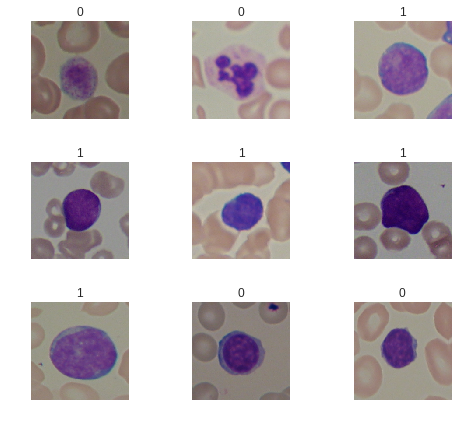

In [0]:
data.show_batch(rows=3, figsize=(7,6))

## View classes info
Now we can run the following code block which will print out the classes list and lengths.

In [0]:
print(data.classes)
len(data.classes),data.c

['0', '1']


(2, 2)

# Resnet18
Now we are going to test how the FastaAI implementation of Resnet18 works with the ALL_IDB2 dataset. 

## Create the convolutional neural network

First we will create the convolutional neural network based on Resnet18, to do this we can use the following code block which uses FastAI  ( [*cnn_learner*](https://docs.fast.ai/vision.learner.html#cnn_learner) previously *create_cnn*) function. We pass the loaded data, specify the resnet18 model, pass error_rate & accuracy as a list for the metrics parameter specifying we want to see both error_rate and accuracy,  and finally specify a weight decay of 1e-1 (1.0).

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate,accuracy], wd=1e-1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:01, 43407660.32it/s]


## learn.lr_find() & learn.recorder.plot()
Now we will use the [learn.lr_find()](https://docs.fast.ai/basic_train.html#lr_find) function to run LR Finder. LR Finder finds the best learning rate to use with our network. As shown from the output, [learn.recorder.plot()](https://docs.fast.ai/basic_train.html#Recorder.plot) function can be used to view the graph. Run the following code block to view the graph.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


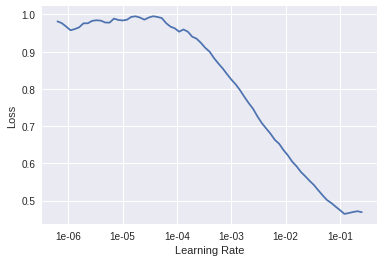

In [0]:
learn.lr_find()
learn.recorder.plot()

## learn.fit_one_cycle() & learn.recorder.plot_losses()
The [learn.fit_one_cycle()](https://docs.fast.ai/basic_train.html#fit_one_cycle) function can be used to fit the model. We use 5 for the parameter *cyc_len* to specify the number of cycles to run, and *max_lr* to specify the maximum learning rate to use which we set as *0.001*. We then use [learn.recorder.plot_losses()](https://docs.fast.ai/basic_train.html#Recorder.plot_losses) to plot the losses from *fit_one_cycle* as a graph.

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.002719,0.866205,0.509804,0.490196,00:04
1,0.860719,0.568154,0.254902,0.745098,00:03
2,0.686442,0.434072,0.156863,0.843137,00:03
3,0.568212,0.349518,0.078431,0.921569,00:04
4,0.499917,0.316367,0.058823,0.941177,00:04


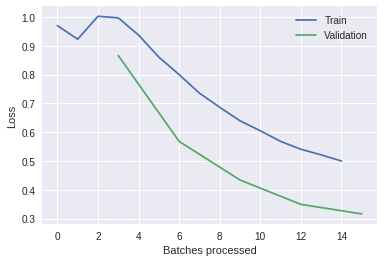

In [0]:
lr = 0.001
learn.fit_one_cycle(cyc_len=5, max_lr=lr)
learn.recorder.plot_losses()

## learn.recorder.plot_lr()
We use  [learn.recorder.plot_lr()](https://docs.fast.ai/basic_train.html#Recorder.plot_lr) to plot the learning rate.

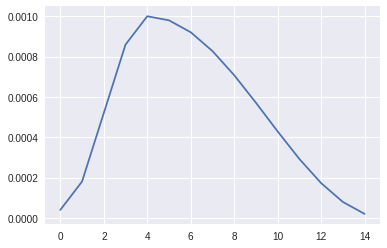

In [0]:
learn.recorder.plot_lr()

## ClassificationInterpretation()
We use  [ClassificationInterpretation()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation) to visualize interpretations of our model.

In [0]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

## interp.plot_top_losses()
We can use [interp.plot_top_losses()](https://docs.fast.ai/vision.learner.html#plot_top_losses) to view our top losses and their details.

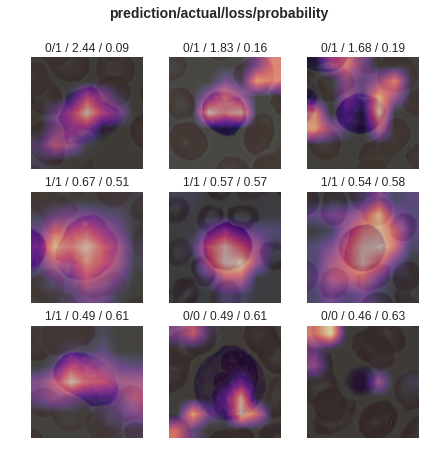

In [0]:
interp.plot_top_losses(9, figsize=(7,7))

## interp.plot_confusion_matrix()
Now we will use  [interp.plot_confusion_matrix()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation.plot_confusion_matrix) to display a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Below, 24 in the top left square represents 24 true negatives, while 2 in the top right square represents 2 false positives, 3 in the bottom left square represents 3 false negatives, and 22 in the bottom right represents 22
true positives.

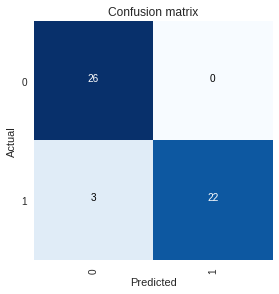

In [0]:
interp.plot_confusion_matrix()

## learn.unfreeze()
Next we use [learn.unfreeze()](https://docs.fast.ai/basic_train.html#Learner.unfreeze) to unfreeze the model.

In [0]:
learn.unfreeze()

## Train the entire (unfrozen) model
Now that we have unfrozen our model, we will use the following code block to train the whole model.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


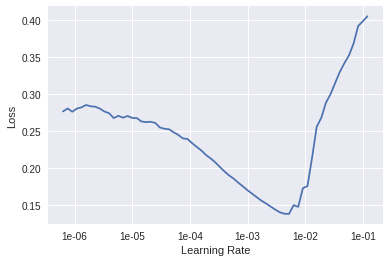

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
nlr = slice(1e-5, 1e-3)
learn.fit_one_cycle(5, nlr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.256227,0.278572,0.058823,0.941177,00:04
1,0.251522,0.233650,0.078431,0.921569,00:04
2,0.206697,0.216816,0.078431,0.921569,00:04
3,0.168818,0.201390,0.078431,0.921569,00:04
4,0.144912,0.188967,0.078431,0.921569,00:04


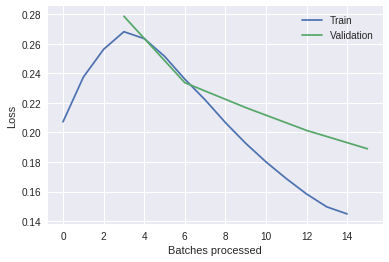

In [0]:
learn.recorder.plot_losses()

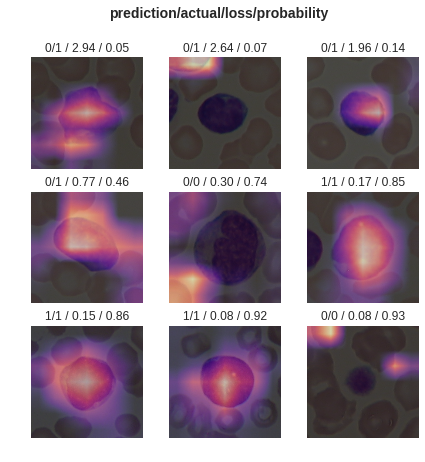

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

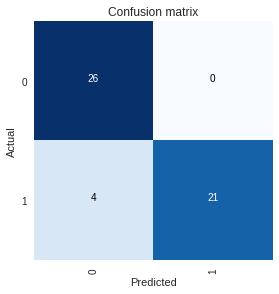

In [0]:
interp.plot_confusion_matrix()

# Contributing

The Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research project encourages and welcomes code contributions, bug fixes and enhancements from the Github.

Please read the [CONTRIBUTING](https://github.com/AMLResearchProject/AML-ALL-Classifiers/blob/master/CONTRIBUTING.md "CONTRIBUTING") document for a full guide to forking our repositories and submitting your pull requests. You will also find information about our code of conduct on this page.

## Acute Myeloid & Lymphoblastic Leukemia Classifiers Contributors

- [Adam Milton-Barker](https://github.com/AdamMiltonBarker "Adam Milton-Barker") - Bigfinite IoT Network Engineer & Intel Software Innovator, Barcelona, Spain
- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - PhD Immunolgy / Bioinformaticia, Bologna, Italy
- [Dr Amita Kapoor](https://github.com/salvatorera "Dr Amita Kapoor") - Delhi University, Delhi, India

&nbsp;

# Versioning

We use SemVer for versioning. For the versions available, see [Releases](https://github.com/AMLResearchProject/AML-ALL-Classifiers/releases "Releases").

# License

This project is licensed under the **MIT License** - see the [LICENSE](https://github.com/AMLResearchProject/AML-ALL-Classifiers/blob/master/LICENSE "LICENSE") file for details.

# Bugs/Issues

We use the [repo issues](https://github.com/AMLResearchProject/AML-ALL-Classifiers/issues "repo issues") to track bugs and general requests related to using this project.
